In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten,MaxPooling2D,Conv2D
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

In [3]:
classes = ['neutral', 'happy']
nb_classes = len(classes)
batch_size_for_data_generator = 20

base_dir = '/content/drive/MyDrive/JPHACKS21/SmileEstimation_Genki/GENKI-4K/sprit_data'

train_dir = base_dir+'/train'
valid_dir = base_dir+'/validation'

# 要調整
img_rows, img_cols = 180, 180

In [4]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(img_rows, img_cols),
                                                    color_mode='rgb',
                                                    classes=classes,
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                    shuffle=True)

Found 3199 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
valid_generator = test_datagen.flow_from_directory(directory=valid_dir,
                                                   target_size=(img_rows, img_cols),
                                                   color_mode='rgb',
                                                   classes=classes,
                                                   class_mode='categorical',
                                                   batch_size=32,
                                                   shuffle=True)

Found 801 images belonging to 2 classes.


In [6]:
model=Sequential()
# 畳み込み層
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(img_rows, img_cols, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

# 全結合層
model.add(Flatten())
model.add(Dense(128,activation='relu'))
# 出力層
model.add(Dense(nb_classes,activation='softmax'))
          
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       1

In [7]:
opt = Adam(lr=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer= opt, 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [9]:
history = model.fit(train_generator,
                    steps_per_epoch=99,
                    epochs=48,
                    validation_data=valid_generator,
                    validation_steps=25,
                    verbose=1)

Epoch 1/48
99/99 [==============================] - 1048s 11s/step - loss: 0.6911 - acc: 0.5384 - val_loss: 0.6826 - val_acc: 0.5450
Epoch 2/48
99/99 [==============================] - 240s 2s/step - loss: 0.6863 - acc: 0.5488 - val_loss: 0.6762 - val_acc: 0.5763
Epoch 3/48
99/99 [==============================] - 237s 2s/step - loss: 0.6846 - acc: 0.5529 - val_loss: 0.6826 - val_acc: 0.5425
Epoch 4/48
99/99 [==============================] - 236s 2s/step - loss: 0.6861 - acc: 0.5466 - val_loss: 0.6803 - val_acc: 0.5675
Epoch 5/48
99/99 [==============================] - 235s 2s/step - loss: 0.6825 - acc: 0.5706 - val_loss: 0.6681 - val_acc: 0.6187
Epoch 6/48
99/99 [==============================] - 249s 3s/step - loss: 0.6792 - acc: 0.5794 - val_loss: 0.6734 - val_acc: 0.6125
Epoch 7/48
99/99 [==============================] - 238s 2s/step - loss: 0.6749 - acc: 0.5832 - val_loss: 0.6697 - val_acc: 0.6125
Epoch 8/48
99/99 [==============================] - 236s 2s/step - loss: 0.6717 -

In [10]:
hdf5_file = os.path.join(base_dir, 'smileEstimation_4000data.hdf5')
model.save(hdf5_file)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

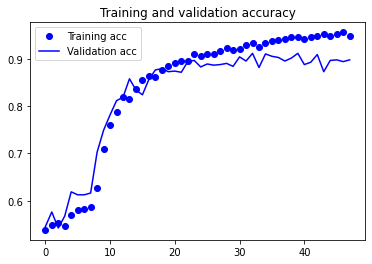

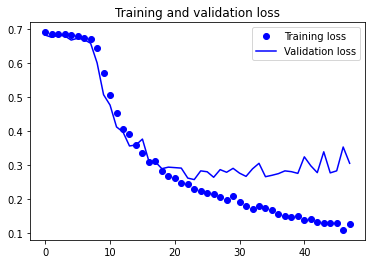

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()